<class 'numpy.ndarray'>
(570, 450)


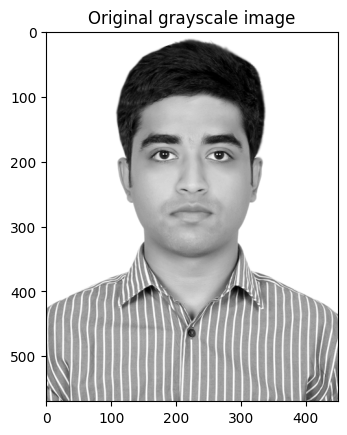

In [6]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import GridSpec 

filepath = 'image1.jpg'

img = cv2.imread(filepath)
h,w,c= img.shape

#color to black and white
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#showing grayscale image
print(type(img))
print(img.shape)
plt.title("Original grayscale image")
plt.imshow(img, cmap= 'gray')
plt.savefig('1.jpg')
plt.show()




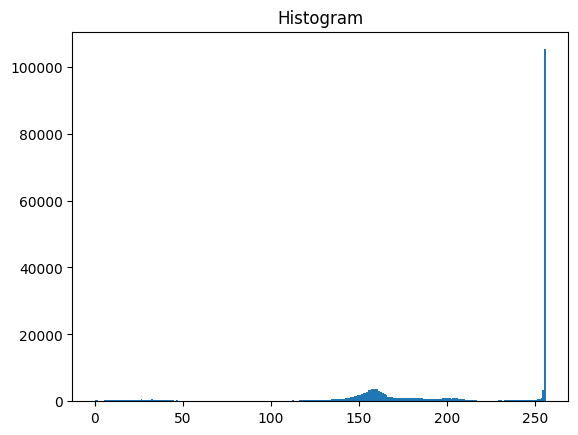

256


In [7]:
#showing histogram

hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.title("Histogram")
plt.hist(img.ravel(),256,[0,256])
plt.savefig('2.jpg')
plt.show()

print(hist.size)

In [8]:
#OTSU IMPLEMENTATION

img_data = img.flatten()        

x = np.bincount(img_data)           #index is gray level, value is frequency

T_candidates = []
sigmasq_w_vals = []

offset_begin = 10
offset_end = 256
for T in range(offset_begin,offset_end):
    foreground = []
    background = []
    for i in range(0,T):
        background.append(x[i])         #loading the bg frequency
    for i in range(T,256):
        foreground.append(x[i])         #loading the fg frequency

    #OMEGA CALCULATION
    omega_b = np.sum(background)/(h*w)
    omega_f = np.sum(foreground)/(h*w)

    #MU CALCULATION
    sum = 0

    for i in range(0,T):
        sum = sum + i*x[i]              #gray level x frequency
    mu_b = sum/np.sum(background)

    sum = 0
    for i in range(T,256):
        sum = sum + i*x[i]
    mu_f = sum/np.sum(foreground)

    #SIGMA SQUARE CALCULATION
    sum =0
    for i in range(0,T):
        var1 = math.pow((i-mu_b),2)
        var2 = x[i]
        sum = sum + (var1*var2)
    sigmasq_b = sum/np.sum(background)

    sum = 0
    for i in range(T,256):
        var1 = math.pow((i-mu_f),2)
        var2 = x[i]
        sum = sum + (var1*var2)
    sigmasq_f = sum/np.sum(foreground)
    
    #WITHIN CLASS VARIANCE CALCULATION
    sigmasq_w = (omega_b*sigmasq_b) + (omega_f*sigmasq_f)

    #WITHIN CLASS VARIANCES APPENDING 
    sigmasq_w_vals.append(sigmasq_w)

#FINDING THE FINAL THRESHOLD, IT IS THE INDEX OF MINIMUM WITHIN CLASS VARIANCE
min_sigmasq_w = np.min(sigmasq_w_vals)
min_index = sigmasq_w_vals.index(min_sigmasq_w)
#T_final = min_index + offset_begin # offset added cause loop started from offset, not 0
T_final = min_index # not adding offset

In [9]:
#BINARIZATION WITH THE FINAL THRESHOLD VALUE
for i in range (0, len(img_data)):
    if img_data[i]<T_final:
        img_data[i] = 0
    else:
        img_data[i] = 255

#RESHAPING FROM 1D TO 2D
bin_image_manual = np.reshape(img_data,(h,w))

#BINARIZATION WITH BUILT IN METHOD
T_builtin, bin_image_builtin = cv2.threshold(img, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(T_final)
print(T_builtin)

179
188.0


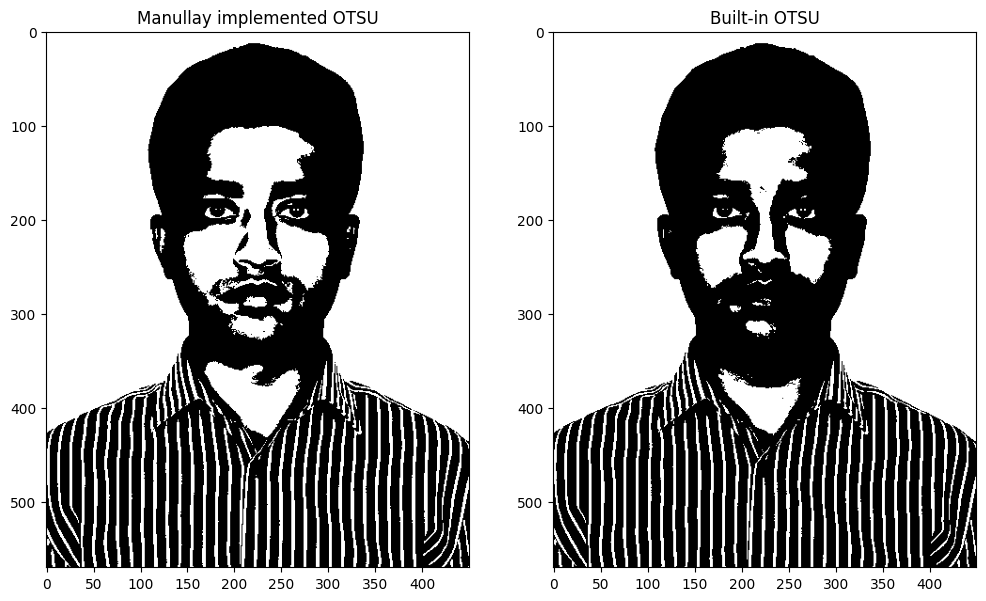

In [10]:
#PLOTTING

fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,2)

fig.add_subplot(gs[0,0])
plt.title("Manullay implemented OTSU")
plt.imshow(bin_image_manual, cmap='gray')

fig.add_subplot(gs[0,1])
plt.title("Built-in OTSU")
plt.imshow(bin_image_builtin, cmap='gray')
plt.savefig('3.jpg')
plt.show()